# Showcase

In [53]:
from augmentation import center_crop_px, center_crop_percents, crop_px, crop_percents, random_crop_px, random_crop_percents
from augmentation import flip_horizontal, flip_vertical
from augmentation import resize_image
from augmentation import zero_pad

In [54]:
from constants import kernel_blur, kernel_sharp

In [55]:
from augmentation import conv_one_step, convolution_one_layer, full_convolution

In [56]:
from augmentation import dropout_random, dropout
from augmentation import shuffle, jitter

In [57]:
from augmentation import opacity, opacity_object, overlay2_images

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from utils import plot_images

In [60]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

In [61]:
def plot_images(pictures: list, columns: int, rows: int, fig_size: tuple) -> None:
    fig=plt.figure(figsize=fig_size)
    for i in range(1, len(pictures) + 1):
        image = pictures[i-1]
        img_name = namestr(image, globals())
        fig.add_subplot(rows, columns, i, title=img_name)
        plt.imshow(image)
        plt.subplots_adjust(top=.92, bottom=.08, left=.1, right=.95, hspace=.25, wspace=.35)
    plt.show()

# Image data

In [62]:
monkey_orig = '/home/jovyan/bootcamp/pics/DSC_3837.jpg'
cat_orig = '/home/jovyan/bootcamp/pics/cat.jpg'
bird_orig = '/home/jovyan/bootcamp/pics/bird.jpg'
sun_orig = '/home/jovyan/bootcamp/pics/Solar.jpg'

### Resize images

In [63]:
monkey = resize_image(monkey_orig, (500, 300))
cat = resize_image(cat_orig, (500, 300))
bird = resize_image(bird_orig, (500, 300))
sun = resize_image(sun_orig, (500, 300))

In [64]:
img = Image.open(monkey_orig)
img_arr = np.asarray(img)
print(f'Original size: {img_arr.shape}, after rehape: {monkey.shape}')

Original size: (3264, 4928, 3), after rehape: (300, 500, 3)


# CROPS

In [65]:
center_cropped_px = center_crop_px(monkey, (300, 240))
center_cropped_percents = center_crop_percents(monkey, (0.6))
cropped_px = crop_px(monkey, 30, 60, (200))
cropped_percents = crop_percents(monkey, (20, 100), (.7, .5))
random_cropped_px = random_crop_px(monkey, (100))
random_cropped_percents = random_crop_percents(monkey, (.4, .6))

In [66]:
pics = [center_cropped_px, center_cropped_percents, cropped_px, cropped_percents, random_cropped_px, random_cropped_percents]

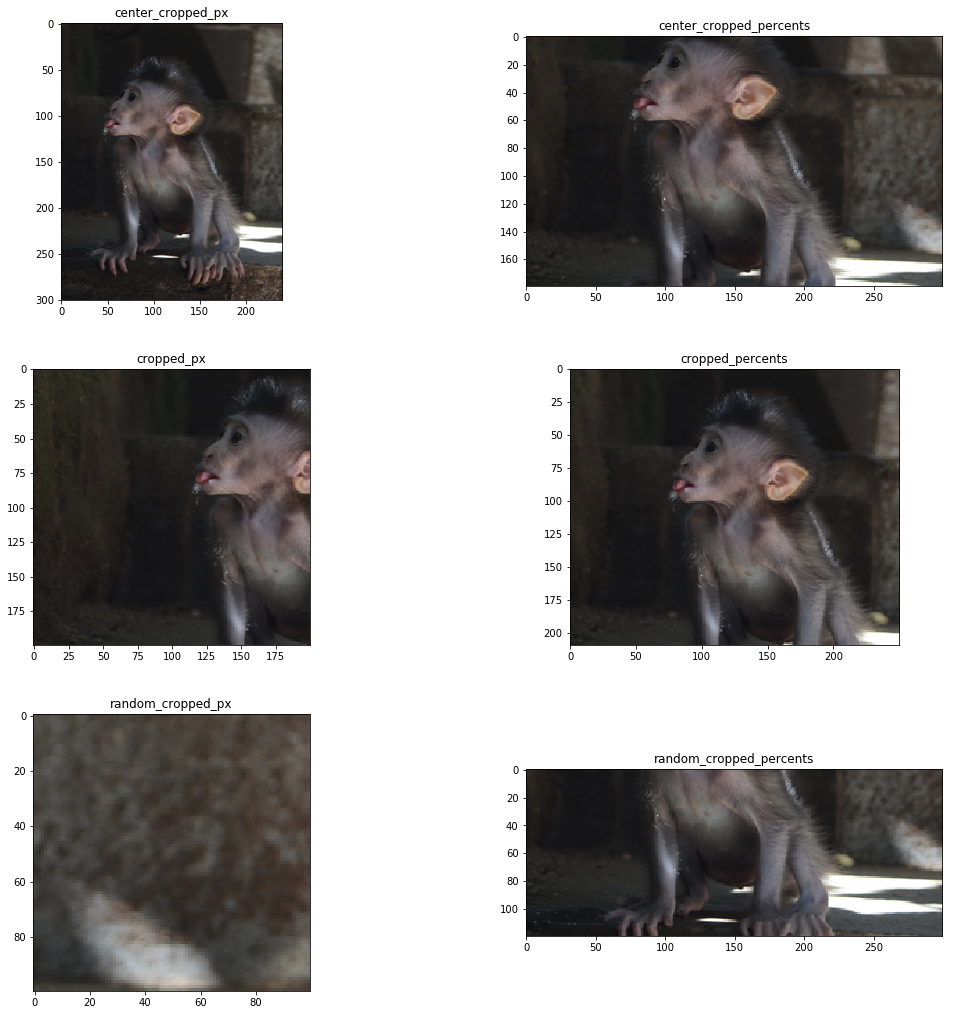

In [67]:
plot_images(pics, 2, 3, (16, 16))

# Flips

In [68]:
before_flipping = monkey
horizontally_flipped = flip_horizontal(monkey)
vertically_fliped = flip_vertical(monkey)
flipped = [before_flipping, horizontally_flipped, vertically_fliped]

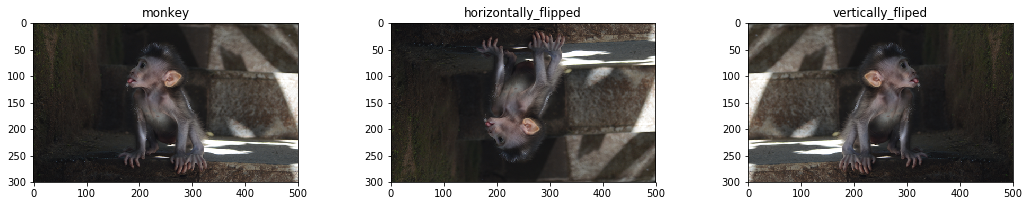

In [69]:
plot_images(flipped, 3, 1, (16, 16))

# Convolution

In [129]:
# before_convolution_1_layer = monkey[:,:,1]
# one_layer_blur = convolution_one_layer(monkey, 1, kernel_blur)
# one_layer_sharp = convolution_one_layer(monkey, 1, kernel_sharp)
before_full_convolution = bird
full_convolution_blur = full_convolution(bird, kernel_blur)
full_convolution_sharp = full_convolution(bird, kernel_sharp)

# conv = [before_convolution_1_layer, one_layer_blur, one_layer_sharp, before_full_convolution, full_convolution_blur, full_convolution_sharp]
conv = [before_full_convolution, full_convolution_blur, full_convolution_sharp]

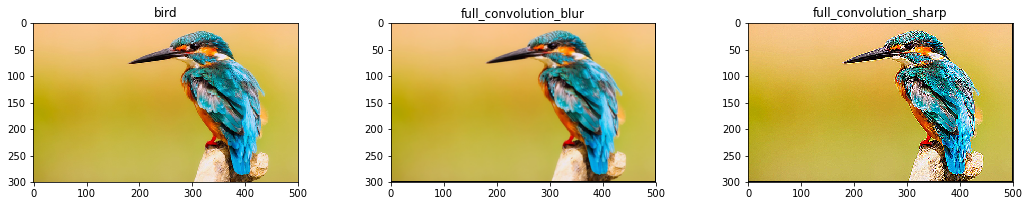

In [130]:
plot_images(conv, 3, 1, (16, 16))

# Dropout

In [75]:
img_array = img_arr.copy()
random_dropped = dropout_random(img_array)
dropped_by_intensity = dropout(img_array, 0.20)

drp = [random_dropped, dropped_by_intensity]


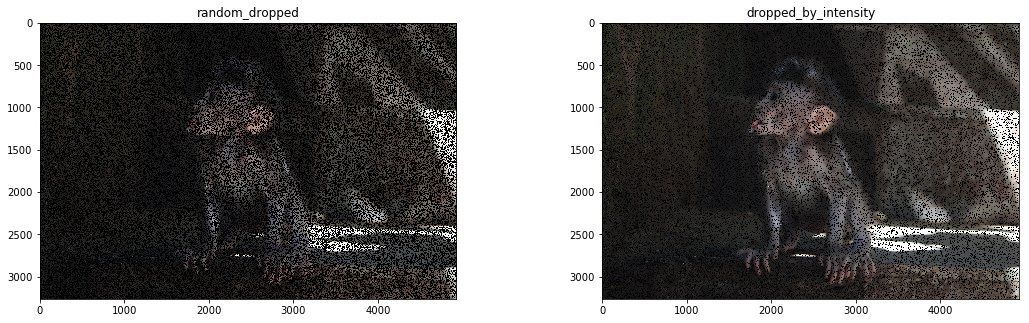

In [76]:
plot_images(drp, 2, 1, (16, 16))

# Shuffle channels

In [109]:
bird_original = bird
shuffled_bird = shuffle(bird)
shuffled_monkey = shuffle(monkey)
shfl = [bird_original, shuffled_bird, shuffled_monkey]

Random channels: BGR
Random channels: GRB


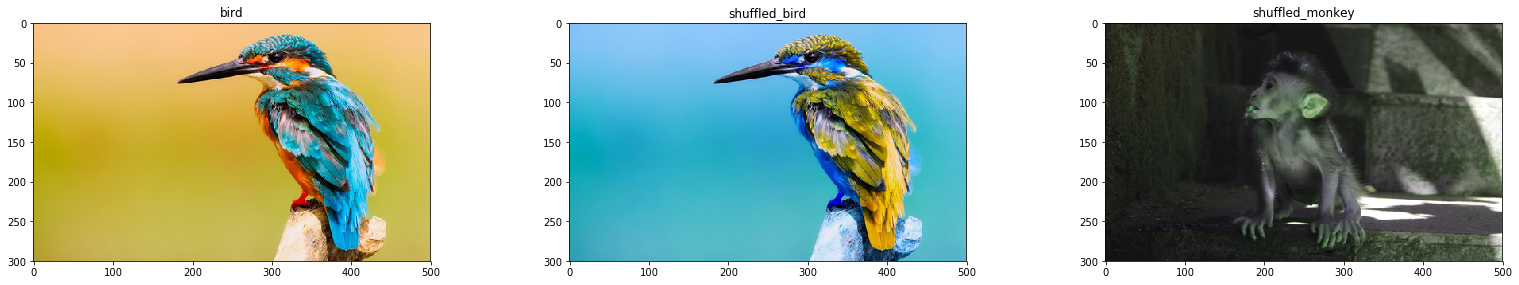

In [110]:
plot_images(shfl, 3, 1, (24, 24))

### Color Jitter

In [95]:
jittered_80 = jitter(bird, .8)
jittered_55 = jitter(bird, .55)
jittered_25 = jitter(bird, .25)
jit = [jittered_80, jittered_55, jittered_25]

Random channel: R
Random channel: R
Random channel: G


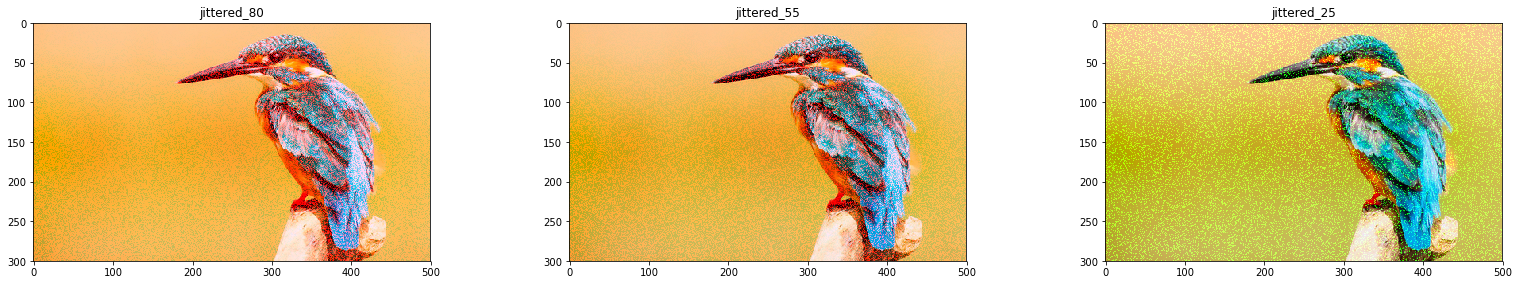

In [96]:
plot_images(jit, 3, 1, (24, 24))

# Fun

In [85]:
original_sun = sun
original_bird = bird
transparent = opacity(sun, 0.7)
opacit_object = opacity_object(sun, (0.3, 0.7))
overlayed = overlay2_images(sun, bird, 1)
overlayed2 = overlay2_images(before_flipping, vertically_fliped, 1)
after = [original_sun, original_bird, transparent, opacit_object, overlayed, overlayed2]

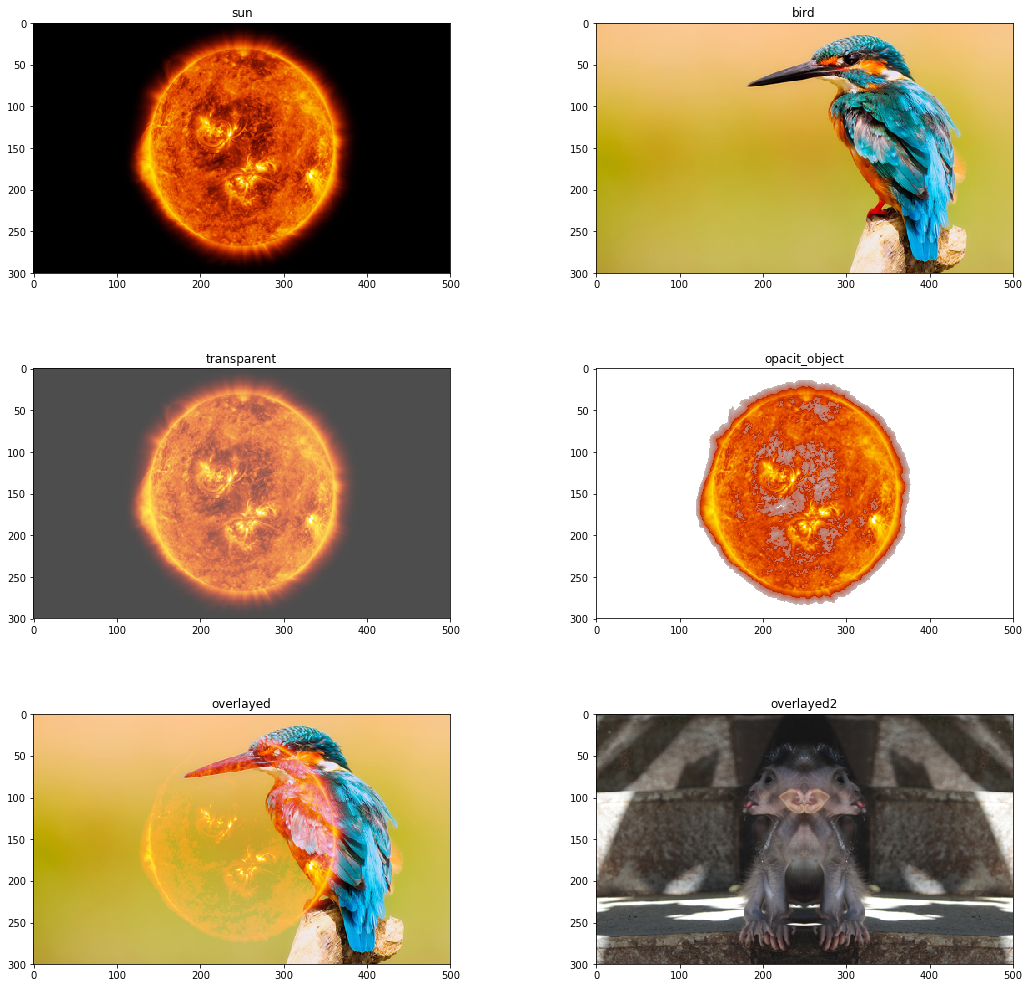

In [86]:
plot_images(after, 2, 3, (16, 16))

# Multiple methods via chaining or pipelines

In [127]:
cr = crop_percents(bird, (20, 150), (.7))
rc = random_crop_percents(monkey, (.6))
random_croped_jittered_flipped = flip_horizontal(jitter(rc, .6))
cropped_jittered = jitter(cr, 0.20)
cropped_flipped_suffled = shuffle(flip_vertical(cr))
cropped_flipped_dropped_blurred = full_convolution(dropout(cropped_flipped, 0.20), kernel_blur)
overlayed_flipped_sharp = flip_horizontal(full_convolution(overlayed, kernel_sharp))
cropped_overlayed = crop_percents(overlayed2, (30, 150), (.5))

mixed = [random_croped_jittered_flipped, cropped_jittered, cropped_flipped_suffled, cropped_flipped_dropped_blurred, overlayed_flipped_sharp, cropped_overlayed]

Random channel: R
Random channel: G
Random channels: GRB


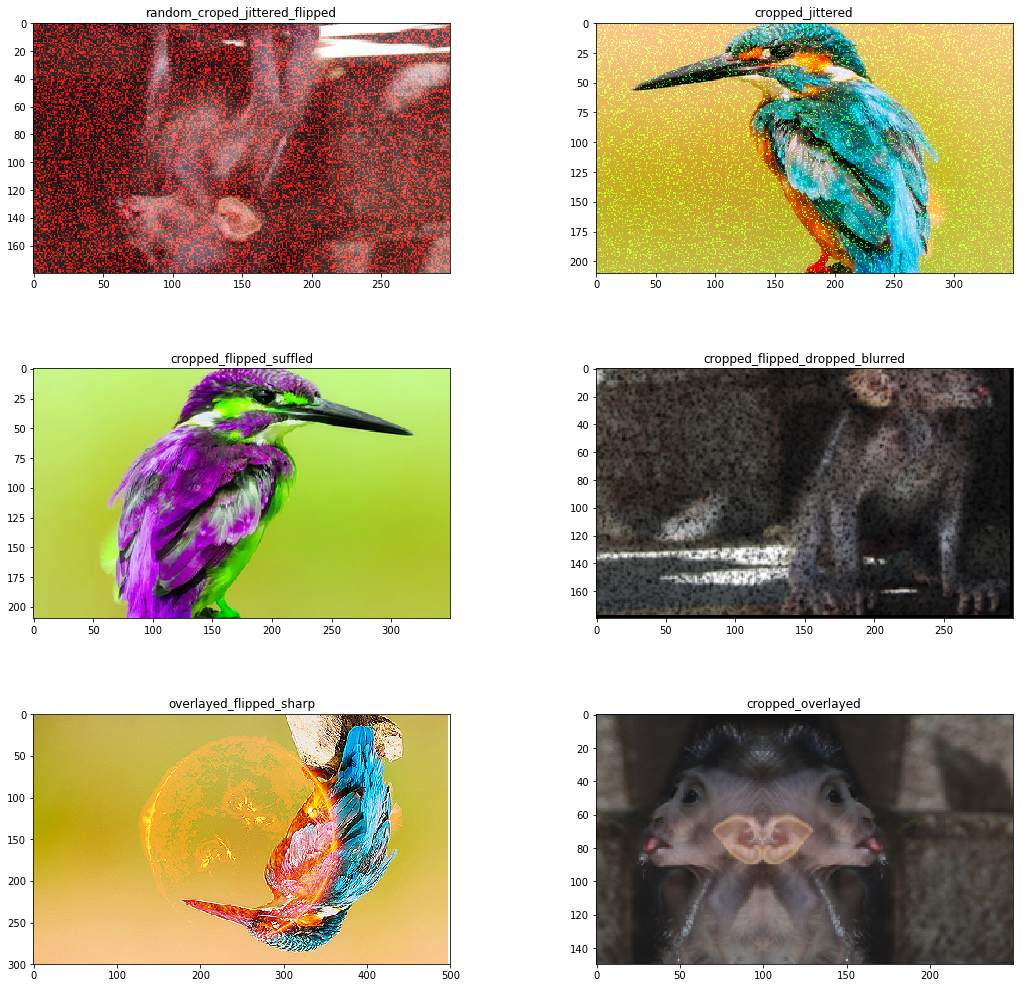

In [128]:
plot_images(mixed, 2, 3, (16, 16))